In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [133]:
from google.colab import files
uploaded = files.upload()

Saving my_movies.csv to my_movies (1).csv


In [179]:
movies = pd.read_csv("my_movies.csv")

In [180]:
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [181]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [182]:
movies.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [183]:
movies.shape

(10, 10)

In [184]:
movies.sum()

Sixth Sense      6
Gladiator        7
LOTR1            2
Harry Potter1    2
Patriot          6
LOTR2            2
Harry Potter2    1
LOTR             1
Braveheart       1
Green Mile       2
dtype: int64

<Axes: >

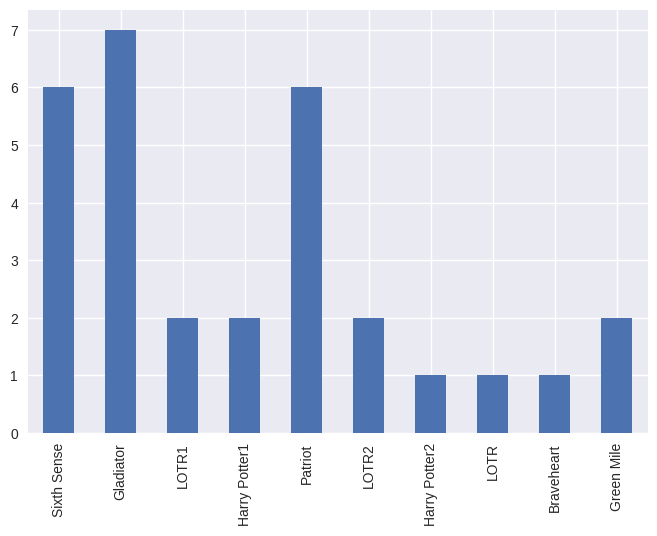

In [185]:
movies.sum().plot.bar()

In [243]:
frequents_items = apriori(movies,min_support=0.01,use_colnames=True)

In [244]:
frequents_items

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [245]:
frequents_items.sort_values("support",ascending=True)

,support,itemsets
26,0.1,"(Harry Potter1, Green Mile)"
28,0.1,"(LOTR2, Green Mile)"
29,0.1,"(Green Mile, LOTR)"
31,0.1,"(Sixth Sense, Gladiator, LOTR)"
32,0.1,"(Sixth Sense, Gladiator, Green Mile)"
33,0.1,"(Harry Potter1, Sixth Sense, LOTR1)"
34,0.1,"(LOTR2, Sixth Sense, LOTR1)"
35,0.1,"(Sixth Sense, LOTR1, Green Mile)"
36,0.1,"(Harry Potter1, Sixth Sense, LOTR2)"
37,0.1,"(Harry Potter1, Sixth Sense, Green Mile)"


In [246]:
rules = association_rules(frequents_items,metric="confidence",min_threshold=0.5)

In [247]:
rules.sort_values("confidence",ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
76,(LOTR),"(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
181,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
92,"(Harry Potter1, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
93,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
94,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
173,"(Harry Potter1, Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
98,"(LOTR2, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
100,"(Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
169,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
168,"(LOTR2, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000


In [248]:
rules[rules.consequents==frozenset({"Gladiator"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
10,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
12,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
13,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.6,-0.333333
32,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
37,"(Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
40,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.6,-0.333333
78,"(Braveheart, Patriot)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
82,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333


In [249]:
rules.shape,len(rules)

((216, 10), 216)

In [250]:
filtered_rules = rules[(rules['confidence'] >= 0.5) & (rules['support'] >= 0.2)]

In [251]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
8,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
9,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
10,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
16,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
17,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
31,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [253]:
fn = apriori(movies,min_support=0.1,use_colnames=True)

In [254]:
fn

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [255]:
rules_1 = association_rules(fn,metric="confidence",min_threshold=0.5)

In [256]:
rules_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
211,"(Green Mile, Sixth Sense)","(Harry Potter1, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
212,(LOTR1),"(Harry Potter1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
213,(Harry Potter1),"(LOTR2, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(LOTR2),"(Harry Potter1, LOTR1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [257]:
rules_1.sort_values("support",ascending=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
107,(Harry Potter1),"(LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
137,"(Sixth Sense, LOTR1, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
138,"(Harry Potter1, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
139,"(Harry Potter1, LOTR1)","(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
140,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
34,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
10,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000


In [258]:
rules_1.shape

(216, 10)

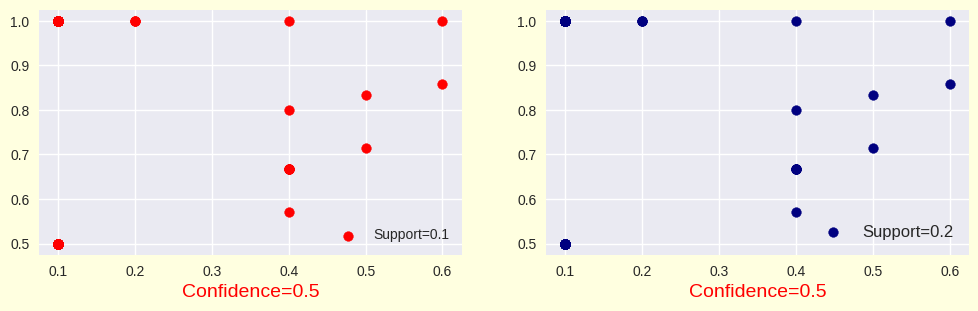

In [259]:
plt.figure(figsize=(12,7),facecolor="lightyellow")
plt.style.use("seaborn")
plt.subplot(2,2,1)
plt.scatter(rules.support,rules.confidence,color="red")
plt.xlabel("Confidence=0.5",color="r",size=14)

plt.legend(["Support=0.1"],loc="best",fontsize=10)

plt.subplot(2,2,2)
plt.scatter(rules_1.support,rules_1.confidence,color="navy")

plt.xlabel("Confidence=0.5",color="r",size=14)
plt.legend(["Support=0.2"],loc="best",fontsize=12)

In [260]:

x1= rules[(rules['confidence'] >= 0.5)]

In [261]:
x1.shape

(216, 10)

In [262]:
y1= rules[(rules['support'] >= 0.1)]

In [263]:
y1.shape

(216, 10)

In [264]:
x1.sort_values("support",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
10,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
36,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
...,...,...,...,...,...,...,...,...,...,...
83,"(Gladiator, LOTR)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
84,(Green Mile),"(Gladiator, LOTR)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
85,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
86,"(Harry Potter1, LOTR1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889


In [265]:
y1.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
76,(LOTR),"(Sixth Sense, Green Mile)",0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
181,"(LOTR2, Green Mile)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.000000
92,"(Harry Potter1, Green Mile)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
93,"(Harry Potter1, LOTR1)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
94,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf,0.888889
...,...,...,...,...,...,...,...,...,...,...
77,(Green Mile),"(Sixth Sense, LOTR)",0.2,0.1,0.1,0.5,5.0,0.08,1.8,1.000000
74,"(Sixth Sense, Green Mile)",(LOTR),0.2,0.1,0.1,0.5,5.0,0.08,1.8,1.000000
72,(Green Mile),"(LOTR2, Sixth Sense)",0.2,0.1,0.1,0.5,5.0,0.08,1.8,1.000000
71,(LOTR2),"(Sixth Sense, Green Mile)",0.2,0.2,0.1,0.5,2.5,0.06,1.6,0.750000


In [266]:
rules[rules.consequents==frozenset({"Sixth Sense"})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
8,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
33,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
38,"(Gladiator, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
41,"(Green Mile, Gladiator)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
